<a href="https://colab.research.google.com/github/jithemji/Like_Prediction_Model/blob/main/Audio/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sklearn

In [ ]:
x,sr=librosa.load('/content/drive/MyDrive/video content analysis/demo audio/audio 1.mp3')

In [ ]:
x2,sr2=librosa.load('/content/drive/MyDrive/video content analysis/demo audio/audio 2.mp3')

In [ ]:
import librosa.display as lbd

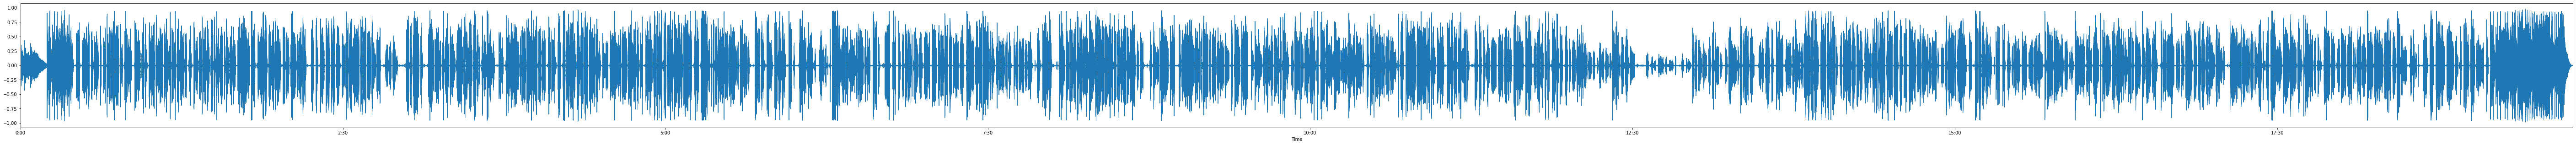

In [ ]:
plt.figure(figsize=(100,5))
lbd.waveplot(x,sr=sr)

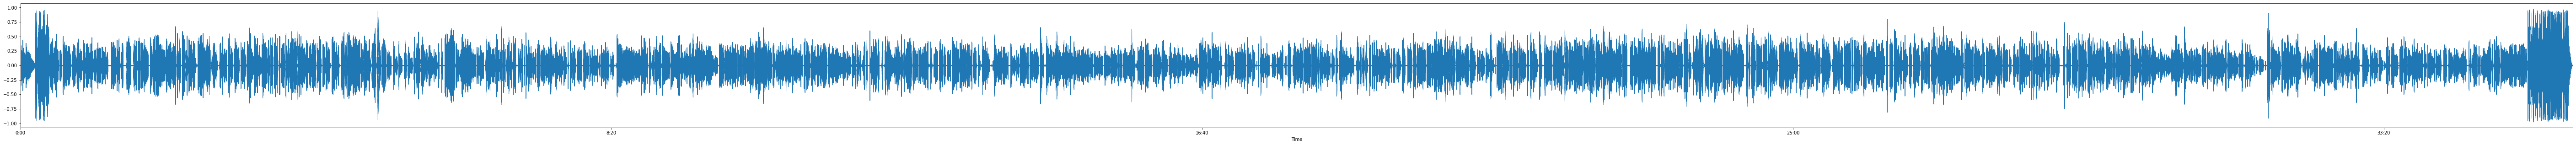

In [ ]:
plt.figure(figsize=(100,5))
lbd.waveplot(x2,sr=sr2)

In [ ]:
X =librosa.stft(x)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(100,5))
lbd.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

In [ ]:
X2 =librosa.stft(x2)
Xdb2=librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(100,5))
lbd.specshow(Xdb2,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

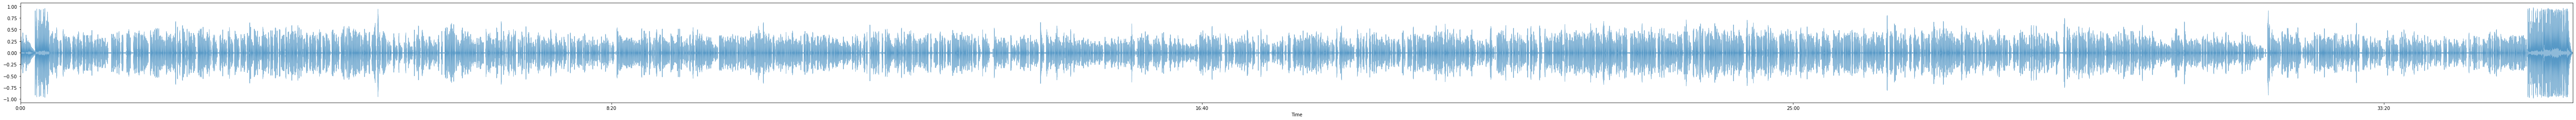

In [ ]:
spec_cent=librosa.feature.spectral_centroid(x,sr=sr)
plt.figure(figsize=(100,4))
lbd.waveplot(x,sr=sr,alpha=0.5)

In [ ]:
#problem 1 
spec_cent

array([[   0.        ,    0.        ,    0.        , ..., 2216.72306566,
        2436.92967437, 2924.3350674 ]])

In [ ]:
frames=range(len(spec_cent))
t=librosa.frames_to_time(frames)
def normalize(x,axis=0):
  return sklearn.preprocessing.minmax_scale(x,axis=axis)
plt.figure(figsize=(100,5))
plt.plot(t,normalize(spec_cent),color='b')

In [ ]:
#zero crossing rate
zcrr=librosa.zero_crossings(x,pad=False)
print(sum(zcrr))

2227740


In [ ]:
zcrr2=librosa.zero_crossings(x2,pad=False)
print(sum(zcrr2))

3999862


In [ ]:
mfcc=librosa.feature.mfcc(x,sr=sr)
mfcc

array([[-5.0904916e+02, -5.0904916e+02, -5.0904916e+02, ...,
        -5.0745984e+02, -5.0866794e+02, -5.0904916e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.2329669e+00,  5.3692210e-01,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.1895590e+00,  5.3043693e-01,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.9530646e-02,  2.8533816e-02,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.3365688e-01, -1.8971384e-02,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -4.1072619e-01, -6.6190228e-02,  0.0000000e+00]], dtype=float32)

In [ ]:
mfcc.shape

(20, 93020)

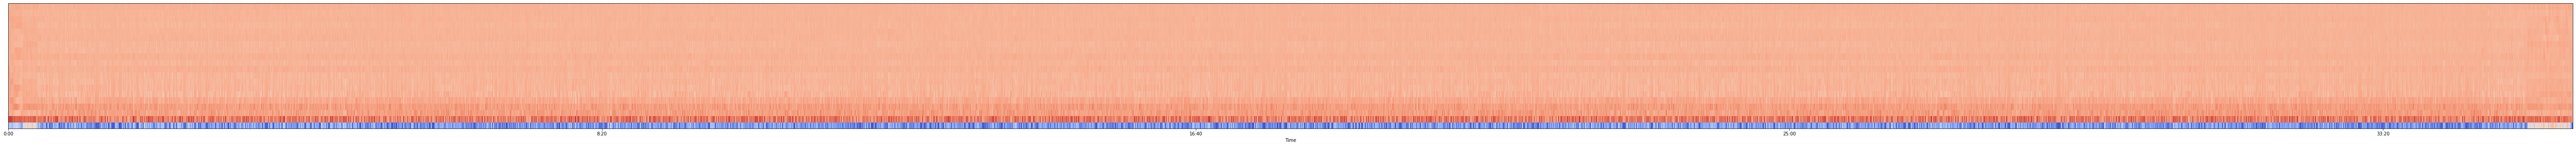

In [ ]:
plt.figure(figsize=(100,5))
lbd.specshow(mfcc,sr=sr,x_axis='time')

In [ ]:
spec_rolloff=librosa.feature.spectral_rolloff(x,sr=sr)
spec_rolloff

array([[   0.        ,    0.        ,    0.        , ..., 4855.73730469,
        5490.96679688, 6793.72558594]])

In [ ]:
spec_rolloff.shape

(1, 93020)

In [ ]:
plt.figure(figsize=(100,5))
lbd.waveplot(x,sr=sr,)
plt.plot(t,normalize(spec_rolloff),color='r')

In [ ]:
spec_bw=librosa.feature.spectral_bandwidth(x,sr=sr)
spec_bw

In [ ]:
spec_bw.shape

In [ ]:
chromagram=librosa.feature.chroma_stft(x,sr=sr)
chromagram

array([[0.        , 0.        , 0.        , ..., 0.13253292, 0.2514672 ,
        0.42521772],
       [0.        , 0.        , 0.        , ..., 0.07327972, 0.13415754,
        0.38925585],
       [0.        , 0.        , 0.        , ..., 0.15290713, 0.20800865,
        0.5567103 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.55610377],
       [0.        , 0.        , 0.        , ..., 0.719586  , 0.8301035 ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.351839  , 0.4830617 ,
        0.7726935 ]], dtype=float32)

In [ ]:
chromagram.shape

(12, 93020)

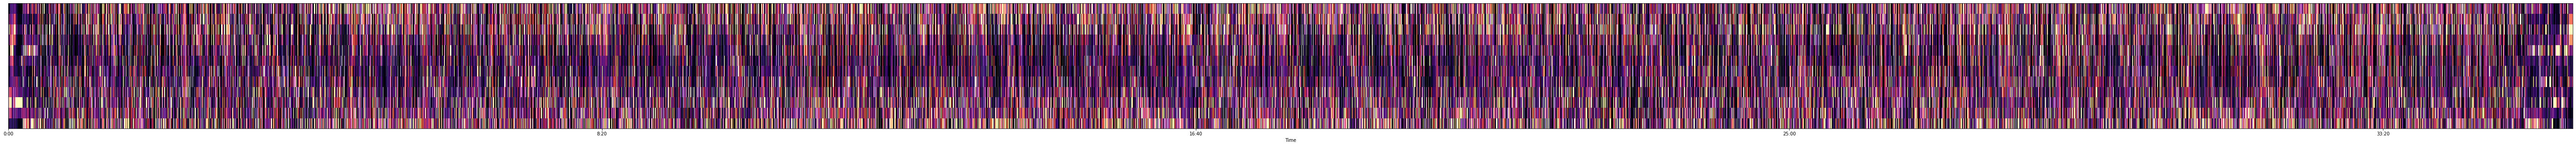

In [ ]:
plt.figure(figsize=(100,5))
lbd.specshow(chromagram,sr=sr,x_axis='time')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
